# **Home Assignment: Deep Learning from Scratch**

In [1]:
# Install a conda package in the current Jupyter kernel
import sys
import numpy as np
import matplotlib.pyplot as plt
import scipy
import warnings
# import google.colab import drive
warnings.simplefilter("ignore")
from scipy import io


In [ ]:
# !conda install --yes --prefix {sys.prefix} numpy
# import numpy as np
# !pip install --yes -q matplotlib-venn probfit
# !pip install -q matplotlib-venn iminuit
# !pip install --user numpy scipy matplotlib ipython jupyter pandas sympy nose
# !pip install --yes --prefix {sys.prefix} numpy

## Part I: the classifier and optimizer

1. *Write the code for computing the loss function "soft-max regression" and its gradient with respect to wj and the biases. Make sure that the derivatives are correct using the gradient test (See the subsection "Gradient and Jacobian Verification" in the notes). You should demonstrate and submit the results of the gradient test.*

In [2]:
import scipy.io
mat = scipy.io.loadmat('PeaksData.mat')

In [3]:
X = mat['Yt']
Y = mat['Ct']
X_val = mat['Yv']
Y_val = mat['Cv']
print(X.shape)
print(Y.shape)

(2, 25000)
(5, 25000)


In [4]:
import numpy as np

class softmax:
    def gradient(self, X, Y, error, W):
        M = X.shape[1]
        grad_theta = 1/M * X.dot(error.T)
        grad_b = 1/M * np.sum(error, axis=1)
        grad_data = 1/M * W.dot(error)
        return grad_theta, grad_b, grad_data
        
    def __call__(self, x):
        exp = np.exp(x)
        return (exp / np.sum(exp, axis=0))

In [5]:
def cross_entropy_loss(y_true, y_predicted, epsilon=1e-10):
    predictions = np.clip(y_predicted, epsilon, 1. - epsilon)
    M = predictions.shape[1]
    return -np.sum(y_true * np.log(predictions)) / M

In [6]:
def gradient_test_with_respect_to_inputs(loss, activation, X, Y):
    dim_out = Y.shape[0]
    dim_in = X.shape[0]
    weights = np.random.normal(.5, .5, size=(dim_in, dim_out))
    biases = np.random.normal(.5, .5, size=(dim_out, 1))
    d = np.random.normal(.5, .5, size=(dim_in, 1))
    d = d / np.linalg.norm(d)
    without_gradient = []
    with_gradient = []
    for i in range(20):
        e = np.power(0.5, i)
        vec = e * d
        predictions = activation(weights.T.dot(X) + biases)
        predictions_d = activation(weights.T.dot(X + vec) + biases)
        diff_f = loss(Y, predictions_d) - loss(Y, predictions)
        without_gradient.append(np.abs(diff_f))
        _, _, grad_data = activation.gradient(X, Y, predictions - Y, weights)
        with_gradient.append(np.abs(diff_f - vec.T.dot(grad_data).reshape(1)))
    return without_gradient, with_gradient

In [7]:
def gradient_test_with_respect_to_baises(loss, activation, X, Y):
    dim_out = Y.shape[0]
    dim_in = X.shape[0]
    weights = np.random.normal(.5, .5, size=(dim_in, dim_out))
    biases = np.random.normal(.5, .5, size=(dim_out, 1))
    d = np.random.normal(.5, .5, size=(dim_out, 1))
    d = d / np.linalg.norm(d)
    without_gradient = []
    with_gradient = []
    for i in range(20):
        e = np.power(0.5, i)
        vec = e * d
        predictions = activation(weights.T.dot(X) + biases)
        predictions_d = activation(weights.T.dot(X) + (biases + vec))
        diff_f = loss(Y, predictions_d) - loss(Y, predictions)
        without_gradient.append(np.abs(diff_f))
        _, grad_baises, _ = activation.gradient(X, Y, predictions - Y, weights)
        with_gradient.append(np.abs(diff_f - vec.T.dot(grad_baises).reshape(1)))
    return without_gradient, with_gradient

In [8]:
def gradient_test_with_respect_to_weigths(loss, activation, X, Y):
    dim_out = Y.shape[0]
    dim_in = X.shape[0]
    weights = np.random.normal(.5, .5, size=(dim_in, dim_out))
    biases = np.random.normal(.5, .5, size=(dim_out, 1))
    d = np.random.normal(.5, .5, size=(dim_in, dim_out))
    d = d / np.linalg.norm(d)
    without_gradient = []
    with_gradient = []
    for i in range(20):
        e = np.power(0.5, i)
        vec = e * d
        predictions = activation(weights.T.dot(X) + biases)
        predictions_d = activation((weights + vec).T.dot(X) + biases)
        diff_f = loss(Y, predictions_d) - loss(Y, predictions)
        without_gradient.append(np.abs(diff_f))
        grad_theta, _, _ = activation.gradient(X, Y, predictions - Y, weights)
        with_gradient.append(np.abs(diff_f - (np.ravel(vec) @ np.ravel(grad_theta)).reshape(1)))
    return without_gradient, with_gradient

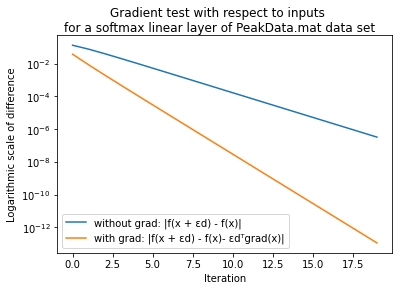

In [9]:
without_grad, with_grad = gradient_test_with_respect_to_inputs(cross_entropy_loss,
                                                               softmax(), X[:, 0].reshape(2,1), Y[:, 0].reshape(5,1))

plt.suptitle('Gradient test with respect to inputs \nfor a softmax linear layer of PeakData.mat data set')
plt.plot(without_grad, label='without grad: |f(x + \u03B5d) - f(x)|')
plt.plot(with_grad, label= 'with grad: |f(x + \u03B5d) - f(x)- \u03B5dᵀgrad(x)|')
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Logarithmic scale of difference')
plt.legend()
plt.show()

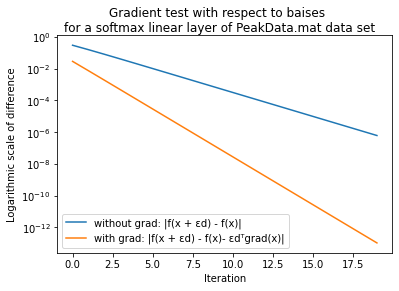

In [10]:
without_grad, with_grad = gradient_test_with_respect_to_baises(cross_entropy_loss, softmax(),
                                                               X[:, 0].reshape(2,1), Y[:, 0].reshape(5,1))
plt.suptitle('Gradient test with respect to baises \nfor a softmax linear layer of PeakData.mat data set')
plt.plot(without_grad, label='without grad: |f(x + \u03B5d) - f(x)|')
plt.plot(with_grad, label='with grad: |f(x + \u03B5d) - f(x)- \u03B5dᵀgrad(x)|')
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Logarithmic scale of difference')
plt.legend()
plt.show()

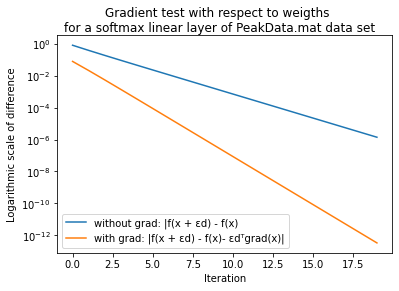

In [11]:
without_grad, with_grad = gradient_test_with_respect_to_weigths(cross_entropy_loss, softmax(),
                                                                X[:, 0].reshape(2,1), Y[:, 0].reshape(5,1))
plt.suptitle('Gradient test with respect to weigths \nfor a softmax linear layer of PeakData.mat data set')
plt.plot(without_grad, label='without grad: |f(x + \u03B5d) - f(x)')
plt.plot(with_grad, label='with grad: |f(x + \u03B5d) - f(x)- \u03B5dᵀgrad(x)|')
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Logarithmic scale of difference')
plt.legend()
plt.show()

In [87]:
class linear_layer:
    def __init__(self, dim_in, dim_out, activation):
        self._A = np.random.normal(.5, .5, size=(dim_in, dim_out))
        self._B = np.random.normal(.5, .5, size=(dim_out, 1))
        self._activation = activation
        self._dim_in = dim_in
        self._dim_out = dim_out
        
    def update_weigths(self, gradient_theta, gradient_b, learning_rate):
        gradient_b = gradient_b.reshape(self._dim_out, 1)
        self._A = self._A - learning_rate * gradient_theta
        self._B = self._B - learning_rate * gradient_b
    
    def gradient(self, X, Y, error):
        return self._activation.gradient(X, Y, error, self._A)
    
    def dim_in(self):
        return self._dim_in
    
    def dim_out(self):
        return self._dim_out
    
    def activate_with_weigths_change(self, d, x):
        return self._activation((self._A + d).T.dot(x) + self._B)
        
    def activate_with_biases_change(self, d, x):
        return self._activation(self._A.T.dot(x) + (self._B + d))
    
    def __call__(self, x):
        return self._activation(self._A.T.dot(x) + self._B)

In [109]:
class sequential_model:
    def __init__(self, *layers, learning_rate=0.1):
        self._learning_rate = learning_rate
        self._layers = []
        self._outputs = []
        last_dim_out = 0
        for layer in layers:
            if last_dim_out != 0 and last_dim_out != layer.dim_in():
                print('dimension dont match layer out dim {} , next layer dim in {}'.format(last_dim_out, layer.dim_in()))
                raise 
            self._layers.append(layer)
            last_dim_out = layer.dim_out()
                
    def update_weigths(self, Y_true):
        error = self._outputs[-1] - Y_true
        for i in range(1, len(self._layers) + 1):
            X = self._outputs[-i - 1]
            Y = self._outputs[-i]
            gradient_theta, gradient_b, error = self._layers[-i].gradient(X, Y, error)
            self._layers[-i].update_weigths(gradient_theta, gradient_b, self._learning_rate)

    def seq_gradient(self, Y_true):
        gradient = []
        error = self._outputs[-1] - Y_true
        for i in range(1, len(self._layers) + 1):
            X = self._outputs[-i - 1]
            Y = self._outputs[-i]
            gradient_theta, gradient_b, error = self._layers[-i].gradient(X, Y, error)
            gradient.append((gradient_theta, gradient_b, error, X, Y))
        return gradient
            
    def activate_from_layer(self, x, layer_num):
        new_x = np.array(x, copy=True)
        for layer in self._layers[layer_num:]:
            new_x = layer(new_x)
        return new_x
    
    def activate_from_layer_with_weigths_change(self, x, d, layer_num):
        new_x = np.array(x, copy=True)
        new_x = self._layers[layer_num].activate_with_weigths_change(d, new_x)
        for layer in self._layers[layer_num + 1:]:
            new_x = layer(new_x)
        return new_x
    
    def activate_from_layer_with_baises_change(self, x, d, layer_num):
        new_x = np.array(x, copy=True)
        new_x = self._layers[layer_num].activate_with_biases_change(d, new_x)
        for layer in self._layers[layer_num + 1:]:
            new_x = layer(new_x)
        return new_x

    def __call__(self, x):
        new_x = np.array(x, copy=True) 
        self._outputs = []
        self._outputs.append(new_x)
        for layer in self._layers:
            new_x = layer(new_x)
            self._outputs.append(new_x)
        return new_x

    def layers(self):
        return self._layers
    
    def run_history(self):
        return self._outputs

2. *Write the code for minimizing an objective function using SGD or some other SGD variant (SGD with momentum, for example)*

In [14]:
def accuracy(Y_true, Y_predicted):
    return np.sum(np.argmax(Y_true, axis=0) == np.argmax(Y_predicted, axis=0)) / Y_true.shape[1]

In [15]:
import math
def SGD(model, X, Y, X_val, Y_val, epoch, batch_size):
    accuracy_train = []
    accuracy_val = []
    loss_train = []
    loss_val = []
    number_of_iterations = math.ceil(X.shape[1] / batch_size)
    for i in range(epoch):
        iter_accuracy = 0
        iter_loss = 0
        for j in range(0, X.shape[1], batch_size):
            Y_predicted = model(X[:, j:j+batch_size])
            model.update_weigths(Y[:, j:j+batch_size])
            iter_accuracy += accuracy(Y[:, j:j+batch_size], Y_predicted)
            iter_loss += cross_entropy_loss(Y[:, j:j+batch_size], Y_predicted)
        Y_predicted_val = model(X_val)
        accuracy_train.append(iter_accuracy / number_of_iterations)
        loss_train.append(iter_loss / number_of_iterations)
        accuracy_val.append(accuracy(Y_val, Y_predicted_val))
        loss_val.append(cross_entropy_loss(Y_val, Y_predicted_val))
    return loss_train, accuracy_train, loss_val, accuracy_val

3. *Demonstrate the minimization of the softmax function using your SGD variant. Plot a graph of the success percentages of the data classification after each epoch - for both the training data and the validation data. You may only randomly subsample the
two data sets for the plots as these are extra computations that are not related to the optimization itself. Try a few learning rates and min-batch sizes and see how they influence the performance (submit the graphs only for your best option, but also write about your tries). Run as many iterations of SGD as you see that is needed (i.e., more iterations do not improve the accuracy, even if the learning rate decreases).*

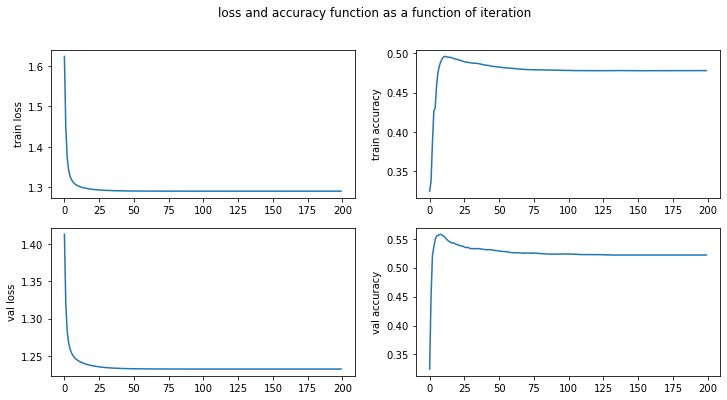

In [16]:
import matplotlib.pyplot as plt

model = sequential_model(
        linear_layer(2, 5, activation=softmax())
        )

loss_train, accuracy_train, loss_val, accuracy_val = SGD(model, X, Y, X_val, Y_val, 200, 2500)

#fig = plt.figure(figsize=(10,6))

fig, axs = plt.subplots(2, 2, figsize=(12,6))
fig.suptitle('loss and accuracy function as a function of iteration')

axs[0][0].plot(loss_train)
axs[0][0].set_ylabel('train loss')

axs[0][1].plot(accuracy_train)
axs[0][1].set_ylabel('train accuracy')

axs[1][0].plot(loss_val)
axs[1][0].set_ylabel('val loss')

axs[1][1].plot(accuracy_val)
axs[1][1].set_ylabel('val accuracy')

plt.show()

In [17]:
#add grid search

## Part II: the neural network

1. Write the code for the standard neural network. Including the forward pass and back-ward pass (the computation of the "Jacobian transpose times vector"). See that the
Jacobian tests work and submit the tests. This part should not be overlooked.
Remark: for the Jacobian tests use the tanh() activation function, as it is differentiable and will behave properly in the gradient tests. The ReLU function is piecewise linear
and non-smooth and may lead to weird-looking gradient tests. After the gradient test passes, you may use either activation functions in the network.

For this part we will use the class sequential model as declared above and its ### function

In [18]:
class tanh:
    def gradient(self, X, Y, error, W):
        error = (1 - Y**2) * error
        grad_theta = X.dot(error.T)
        grad_b = np.sum(error, axis=1)
        grad_data = W.dot(error)
        return grad_theta, grad_b, grad_data
        
    def __call__(self, x):
        return np.tanh(x)

In [60]:
def model_gradient_test_with_respect_to_inputs(loss, model, X, Y):
    without_jacobain = np.ndarray(shape=(len(model.layers()), 20))
    with_jacobain = np.ndarray(shape=(len(model.layers()), 20))
    layers = model.layers()
    lay_len = len(layers)
    d_array = []
    for j in range(lay_len):
        d =  np.random.normal(.5, .5, size=(layers[j].dim_in(), 1))
        d = d / np.linalg.norm(d)
        d_array.append(d)
    for k in range(20):
        e = np.power(0.5, k)
        predictions = model(X)
        loss_predictions = loss(Y, predictions)
        grad = model.seq_gradient(Y)
        layers = model.layers()
        for j in range(1, lay_len + 1):
            _, _, grad_data, X_current, predictions = grad[j - 1]
            vec = e * d_array[-j]
            loss_predictions_d = loss(Y, model.activate_from_layer(X_current + vec, lay_len - j))
            diff_f = loss_predictions_d - loss_predictions
            without_jacobain[j - 1][k] = np.abs(diff_f)
            with_jacobain[j - 1][k] = np.abs(diff_f - vec.T.dot(grad_data).reshape(1))
    return without_jacobain, with_jacobain

In [123]:
def model_gradient_test_with_respect_to_baises(loss, model, X, Y):
    without_jacobain = np.ndarray(shape=(len(model.layers()), 20))
    with_jacobain = np.ndarray(shape=(len(model.layers()), 20))
    layers = model.layers()
    lay_len = len(layers)
    d_array = []
    for j in range(lay_len):
        d =  np.random.normal(.5, .5, size=(layers[j].dim_out(), 1))
        d = d / np.linalg.norm(d)
        d_array.append(d)
    for k in range(20):
        e = np.power(0.5, k)
        predictions = model(X)
        loss_predictions = loss(Y, predictions)
        grad = model.seq_gradient(Y)
        layers = model.layers()
        for j in range(1, lay_len + 1):
            _, grad_b, _, X_current, predictions = grad[j - 1]
            vec = e * d_array[-j]
            predictions_d = model.activate_from_layer_with_baises_change(X_current, vec, lay_len - j)
            loss_predictions_d = loss(Y, predictions_d)
            diff_f = loss_predictions_d - loss_predictions
            without_jacobain[j - 1][k] = np.abs(diff_f)
            with_jacobain[j - 1][k] = np.abs(diff_f - vec.T.dot(grad_b).reshape(1))
    return without_jacobain, with_jacobain

In [119]:
def model_gradient_test_with_respect_to_weigths(loss, model, X, Y):
    without_jacobain = np.ndarray(shape=(len(model.layers()), 20))
    with_jacobain = np.ndarray(shape=(len(model.layers()), 20))
    layers = model.layers()
    lay_len = len(layers)
    d_array = []
    for j in range(lay_len):
        d =  np.random.normal(.5, .5, size=(layers[j].dim_in(), layers[j].dim_out()))
        d = d / np.linalg.norm(d)
        d_array.append(d)
    for k in range(20):
        e = np.power(0.5, k)
        predictions = model(X)
        loss_predictions = loss(Y, predictions)
        grad = model.seq_gradient(Y)
        layers = model.layers()
        for j in range(1, lay_len + 1):
            grad_theta, _, _, X_current, predictions = grad[j - 1]
            vec = e * d_array[-j]
            predictions_d = model.activate_from_layer_with_weigths_change(X_current, vec, lay_len - j)
            loss_predictions_d = loss(Y, predictions_d)
            diff_f = loss_predictions_d - loss_predictions
            without_jacobain[j - 1][k] = np.abs(diff_f)
            with_jacobain[j - 1][k] = np.abs(diff_f - (np.ravel(vec) @ np.ravel(grad_theta)).reshape(1))
    return without_jacobain, with_jacobain

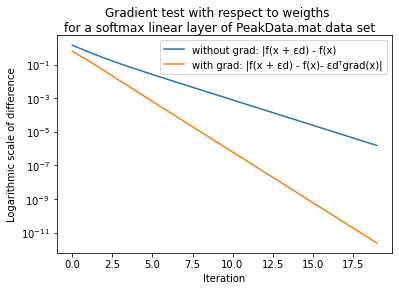

In [120]:
model = sequential_model(
        linear_layer(2, 5, activation=tanh()),
        linear_layer(5, 5, activation=tanh()),
        linear_layer(5, 5, activation=softmax())
        )


without_grad, with_grad = model_gradient_test_with_respect_to_inputs(cross_entropy_loss, model,
                                                                X[:, 0].reshape(2,1), Y[:, 0].reshape(5,1))
plt.suptitle('Gradient test with respect to weigths \nfor a softmax linear layer of PeakData.mat data set')
plt.plot(without_grad[1], label='without grad: |f(x + \u03B5d) - f(x)')
plt.plot(with_grad[1], label='with grad: |f(x + \u03B5d) - f(x)- \u03B5dᵀgrad(x)|')
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Logarithmic scale of difference')
plt.legend()
plt.show()

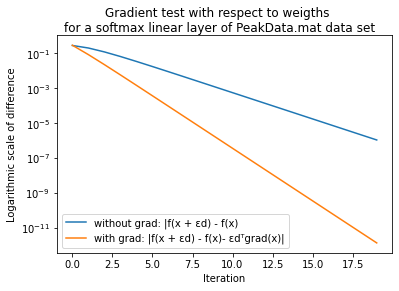

In [121]:
without_grad, with_grad = model_gradient_test_with_respect_to_weigths(cross_entropy_loss, model,
                                                                X[:, 0].reshape(2,1), Y[:, 0].reshape(5,1))
plt.suptitle('Gradient test with respect to weigths \nfor a softmax linear layer of PeakData.mat data set')
plt.plot(without_grad[1], label='without grad: |f(x + \u03B5d) - f(x)')
plt.plot(with_grad[1], label='with grad: |f(x + \u03B5d) - f(x)- \u03B5dᵀgrad(x)|')
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Logarithmic scale of difference')
plt.legend()
plt.show()

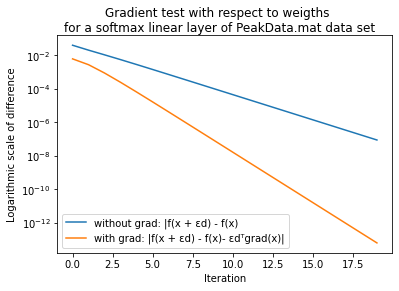

In [125]:
without_grad, with_grad = model_gradient_test_with_respect_to_baises(cross_entropy_loss, model,
                                                                X[:, 0].reshape(2,1), Y[:, 0].reshape(5,1))
plt.suptitle('Gradient test with respect to weigths \nfor a softmax linear layer of PeakData.mat data set')
plt.plot(without_grad[2], label='without grad: |f(x + \u03B5d) - f(x)')
plt.plot(with_grad[2], label='with grad: |f(x + \u03B5d) - f(x)- \u03B5dᵀgrad(x)|')
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Logarithmic scale of difference')
plt.legend()
plt.show()

In [ ]:
def ReLU_der (x):
    if x>0:
        return 1
    else :
        return 0
ReLU_der2  = np.vectorize(ReLU_der)

class ReLU:
    def gradient(self, X, Y,error, W):
        M = X.shape[1]
        a = ReLU_der2(Y)
        # M = np.sum(a)
        error2 = error*a
        grad_theta = 1/M *X.dot(error2.T)
        grad_b = 1/M *np.sum(error2, axis=1)
        grad_data = 1/M *W.dot(error2)
        return grad_theta, grad_b, grad_data

        
    def __call__(self, x):
        return (abs(x)+x)/2

In [ ]:
def ReLU_gradient(X, Y_true, Y_predicted, W):
    grad = Y_predicted - Y_true
    error = grad*ReLU_der2(Y_true)
    M = X.shape[1]
    grad_theta = 1/M*X.dot(error.T)
    grad_b = 1/M*np.sum(error, axis=1)
    grad_data = 1/M*W.dot(error)
    return grad_theta, grad_b.reshape(Y_true.shape[0], 1), grad_data

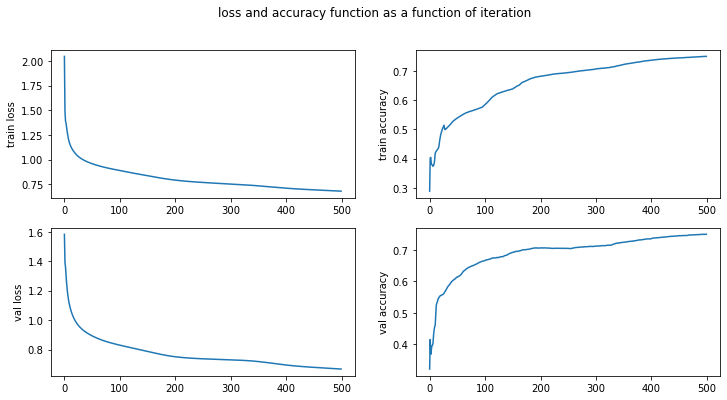

In [126]:
model = sequential_model(
        linear_layer(2, 4, activation=tanh()),
        linear_layer(4, 8, activation=tanh()),
        linear_layer(8, 16, activation=tanh()),
        linear_layer(16, 5, activation=softmax())
)

loss_train, accuracy_train, loss_val, accuracy_val = SGD(model, X, Y, X_val, Y_val, 500, 2500)

#fig = plt.figure(figsize=(10,6))

fig, axs = plt.subplots(2, 2, figsize=(12,6))
fig.suptitle('loss and accuracy function as a function of iteration')

axs[0][0].plot(loss_train)
axs[0][0].set_ylabel('train loss')

axs[0][1].plot(accuracy_train)
axs[0][1].set_ylabel('train accuracy')

axs[1][0].plot(loss_val)
axs[1][0].set_ylabel('val loss')

axs[1][1].plot(accuracy_val)
axs[1][1].set_ylabel('val accuracy')

plt.show()

3. *Compute a forward pass and a backward pass of a network with L layers (L is a parameter). See that the gradient of the whole network (softmax + layers) passes the gradient test. Submit this verification.*

3. *Repeat section 3 for the entire network. Try a few network lengths and see how this influences the performance. Write your conclusions and demonstrate them.*